In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [346]:
start = '2010-01-01'
end = '2024-05-23'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [347]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


In [348]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [349]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


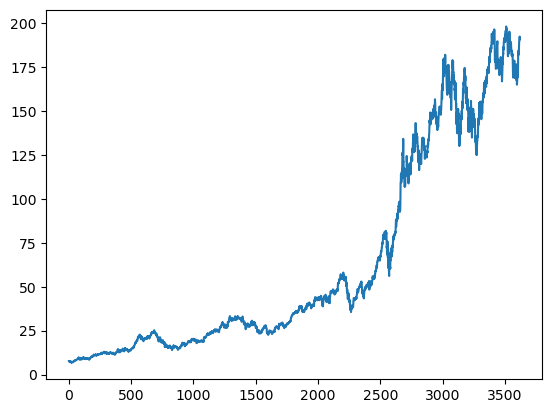

In [350]:
plt.plot(df.Close)

In [351]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3616,190.470001,191.100006,189.660004,189.839996,52845200
3617,189.509995,190.809998,189.179993,189.869995,41282900
3618,189.330002,191.919998,189.009995,191.039993,44361300
3619,191.089996,192.729996,190.919998,192.350006,42309400


In [352]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3616    179.823100
3617    179.785800
3618    179.765699
3619    179.757700
3620    179.730900
Name: Close, Length: 3621, dtype: float64

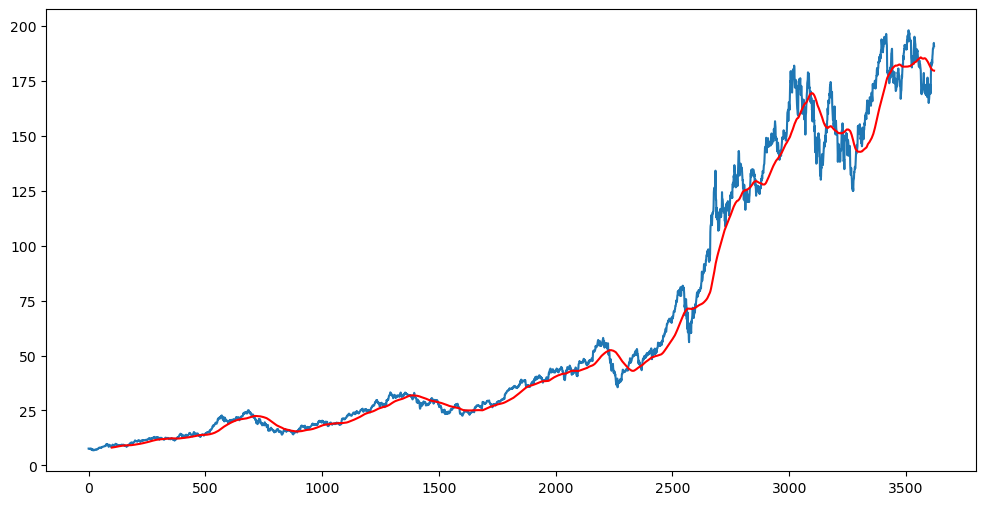

In [353]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [354]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3616    180.79060
3617    180.77705
3618    180.77640
3619    180.82820
3620    180.88845
Name: Close, Length: 3621, dtype: float64

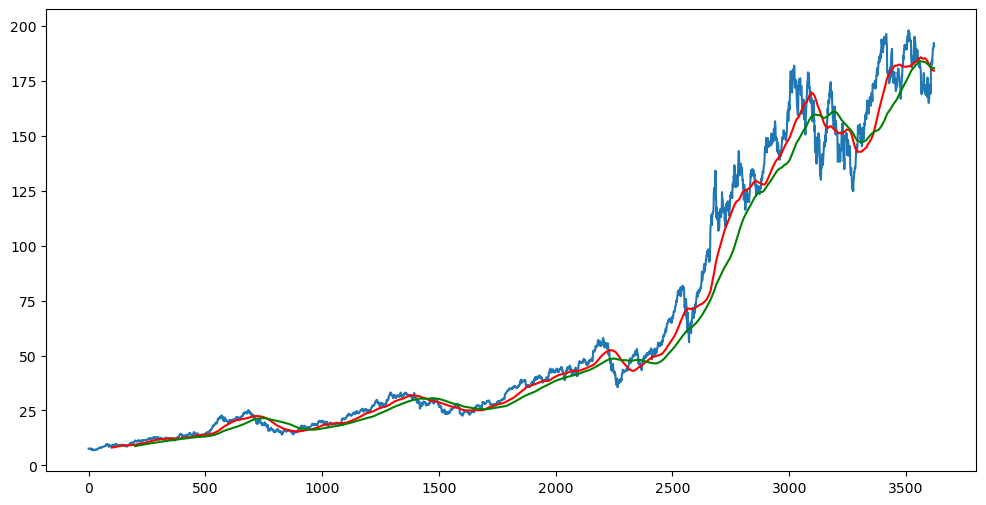

In [355]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [356]:
df.shape

(3621, 5)

In [357]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df.Close).reshape(-1,1))

In [358]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2534, 1)
(1087, 1)


In [359]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [360]:
data_testing.head()

,Close
2534,81.084999
2535,80.967499
2536,77.377502
2537,77.165001
2538,79.712502


In [361]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [362]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0107512 ],
       [0.01093235],
       [0.00926288],
       ...,
       [0.99684705],
       [0.96476971],
       [0.99472228]])

In [363]:
data_training_array.shape

(2534, 1)

In [364]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [365]:
x_train.shape

(2434, 100, 1)

In [366]:
# ML Model

In [367]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [368]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [369]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_36 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_37 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_37 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_38 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_38 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_39 (LSTM)              (None, 120)             

In [370]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
77/77 [==============================] - 10s 105ms/step - loss: 0.0170
Epoch 2/50
77/77 [==============================] - 8s 104ms/step - loss: 0.0047
Epoch 3/50
77/77 [==============================] - 8s 104ms/step - loss: 0.0041
Epoch 4/50
77/77 [==============================] - 8s 104ms/step - loss: 0.0037
Epoch 5/50
77/77 [==============================] - 8s 105ms/step - loss: 0.0032
Epoch 6/50
77/77 [==============================] - 8s 107ms/step - loss: 0.0030
Epoch 7/50
77/77 [==============================] - 8s 105ms/step - loss: 0.0032
Epoch 8/50
77/77 [==============================] - 8s 104ms/step - loss: 0.0030
Epoch 9/50
77/77 [==============================] - 8s 105ms/step - loss: 0.0030
Epoch 10/50
77/77 [==============================] - 8s 101ms/step - loss: 0.0026
Epoch 11/50
77/77 [==============================] - 8s 101ms/step - loss: 0.0026
Epoch 12/50
77/77 [==============================] - 8s 101ms/step - loss: 0.0021
Epoch 13/50
77/77 [=====

In [371]:
model.save('keras_model.h5')

In [372]:
data_testing.head()

,Close
2534,81.084999
2535,80.967499
2536,77.377502
2537,77.165001
2538,79.712502


In [373]:
data_training.tail(100)

,Close
2434,53.320000
2435,53.314999
2436,53.542500
2437,54.174999
2438,55.897499
...,...
2529,79.425003
2530,79.807503
2531,79.577499
2532,77.237503


In [374]:
past_100_days = data_training.tail(100)

In [375]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [376]:
final_df.head()

,Close
0,53.320000
1,53.314999
2,53.542500
3,54.174999
4,55.897499


In [377]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.45389554e-05],
       [0.00000000e+00],
       [1.57119315e-03],
       ...,
       [9.51172297e-01],
       [9.60219659e-01],
       [9.50205417e-01]])

In [378]:
input_data.shape

(1187, 1)

In [379]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [380]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1087, 100, 1)
(1087,)


In [381]:
# Making predictions

y_predicted = model.predict(x_test)

34/34 [==============================] - 2s 40ms/step


In [382]:
y_predicted.shape

(1087, 1)

In [383]:
y_test

array([0.19178839, 0.1909769 , 0.16618325, ..., 0.9511723 , 0.96021966,
       0.95020542])

In [384]:
y_predicted

array([[0.22615072],
       [0.22712065],
       [0.22783189],
       ...,
       [0.8396559 ],
       [0.84545064],
       [0.85051847]], dtype=float32)

In [385]:
scaler.scale_

array([0.00690632])

In [386]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

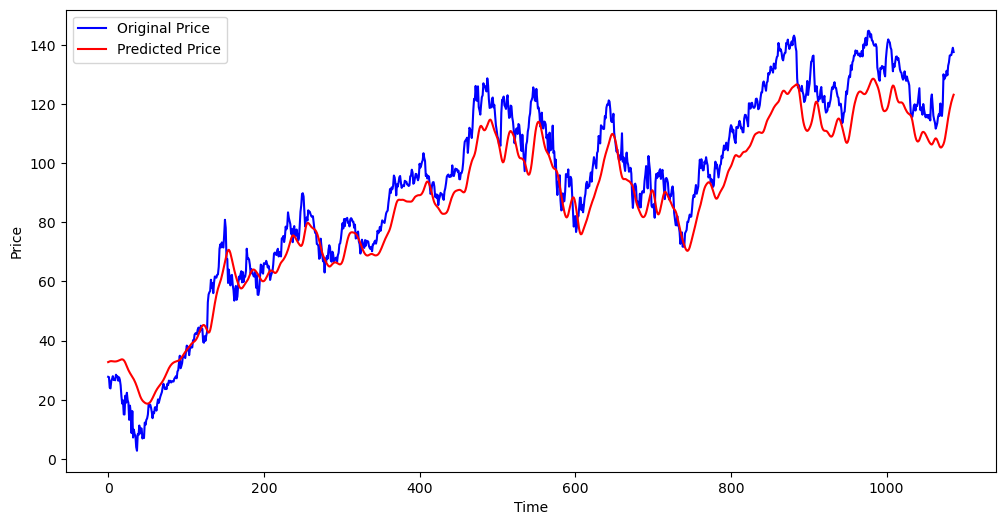

In [387]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [388]:
len(input_data)

1187

In [2]:
x_input = input_data[(len(input_data) - 100):].reshape(1,-1)

NameError: name 'input_data' is not defined

In [390]:
x_input.shape

(1, 100)

In [391]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [392]:
temp_input

[0.9614627455740147,
 0.9138782344012685,
 0.9042784597501693,
 0.8881177062308249,
 0.8830760198719919,
 0.9133257164969301,
 0.9104250765356644,
 0.9176767291298363,
 0.9135328975383051,
 0.9158119943754458,
 0.8999965777190647,
 0.8934354934688048,
 0.9345281563751074,
 0.9547636108841812,
 0.9708553391837388,
 0.9797644401089113,
 0.9750681959950566,
 0.9727890991579161,
 0.9607030466283012,
 0.9559376719126448,
 0.930453350003363,
 0.9053143649570446,
 0.9223039480239043,
 0.9153286070729089,
 0.9279670721248473,
 0.9391553752691754,
 0.9399150742148888,
 0.9323872153595553,
 0.9360475542665344,
 0.9243067332178682,
 0.9097344028097375,
 0.9035877860242424,
 0.9015850008302785,
 0.8908801903705025,
 0.8857004535720959,
 0.890949320972304,
 0.9051071839156696,
 0.8923305630421426,
 0.8829379694324185,
 0.8930902619878563,
 0.8847335735850074,
 0.8801063546909395,
 0.8725784958356059,
 0.8410857129624173,
 0.8066921847459482,
 0.7997858690147396,
 0.7989571448492393,
 0.810905041557

In [393]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
        

[0.85467327]
101
1 day input [0.91387823 0.90427846 0.88811771 0.88307602 0.91332572 0.91042508
 0.91767673 0.9135329  0.91581199 0.89999658 0.89343549 0.93452816
 0.95476361 0.97085534 0.97976444 0.9750682  0.9727891  0.96070305
 0.95593767 0.93045335 0.90531436 0.92230395 0.91532861 0.92796707
 0.93915538 0.93991507 0.93238722 0.93604755 0.92430673 0.9097344
 0.90358779 0.901585   0.89088019 0.88570045 0.89094932 0.90510718
 0.89233056 0.88293797 0.89309026 0.88473357 0.88010635 0.8725785
 0.84108571 0.80669218 0.79978587 0.79895714 0.81090504 0.82485583
 0.82817083 0.81366763 0.82658241 0.82395797 0.83155496 0.84785387
 0.86574121 0.81532508 0.82160985 0.81173387 0.80386068 0.82872335
 0.81608478 0.80607064 0.79785211 0.80344621 0.79771406 0.80296282
 0.79515865 0.80358436 0.79053143 0.84067125 0.85109985 0.82444147
 0.80158158 0.79205083 0.78542072 0.77133188 0.77713316 0.78445384
 0.7990953  0.80510376 0.80102906 0.83003557 0.80814256 0.80102906
 0.82678959 0.89827    0.88673646 0

11 day output [[0.7262437]]
12 day input [0.93452816 0.95476361 0.97085534 0.97976444 0.9750682  0.9727891
 0.96070305 0.95593767 0.93045335 0.90531436 0.92230395 0.91532861
 0.92796707 0.93915538 0.93991507 0.93238722 0.93604755 0.92430673
 0.9097344  0.90358779 0.901585   0.89088019 0.88570045 0.89094932
 0.90510718 0.89233056 0.88293797 0.89309026 0.88473357 0.88010635
 0.8725785  0.84108571 0.80669218 0.79978587 0.79895714 0.81090504
 0.82485583 0.82817083 0.81366763 0.82658241 0.82395797 0.83155496
 0.84785387 0.86574121 0.81532508 0.82160985 0.81173387 0.80386068
 0.82872335 0.81608478 0.80607064 0.79785211 0.80344621 0.79771406
 0.80296282 0.79515865 0.80358436 0.79053143 0.84067125 0.85109985
 0.82444147 0.80158158 0.79205083 0.78542072 0.77133188 0.77713316
 0.78445384 0.7990953  0.80510376 0.80102906 0.83003557 0.80814256
 0.80102906 0.82678959 0.89827    0.88673646 0.89150173 0.89384996
 0.90648853 0.8959909  0.91829827 0.92624049 0.94205602 0.94288474
 0.94309192 0.9511723 

25 day output [[0.5911807]]
26 day input [0.93991507 0.93238722 0.93604755 0.92430673 0.9097344  0.90358779
 0.901585   0.89088019 0.88570045 0.89094932 0.90510718 0.89233056
 0.88293797 0.89309026 0.88473357 0.88010635 0.8725785  0.84108571
 0.80669218 0.79978587 0.79895714 0.81090504 0.82485583 0.82817083
 0.81366763 0.82658241 0.82395797 0.83155496 0.84785387 0.86574121
 0.81532508 0.82160985 0.81173387 0.80386068 0.82872335 0.81608478
 0.80607064 0.79785211 0.80344621 0.79771406 0.80296282 0.79515865
 0.80358436 0.79053143 0.84067125 0.85109985 0.82444147 0.80158158
 0.79205083 0.78542072 0.77133188 0.77713316 0.78445384 0.7990953
 0.80510376 0.80102906 0.83003557 0.80814256 0.80102906 0.82678959
 0.89827    0.88673646 0.89150173 0.89384996 0.90648853 0.8959909
 0.91829827 0.92624049 0.94205602 0.94288474 0.94309192 0.9511723
 0.96021966 0.95020542 0.85467327 0.85541677 0.85149038 0.84301609
 0.83090997 0.81639272 0.80062586 0.78453648 0.76878422 0.75374365
 0.73956323 0.72624367 0

In [394]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [395]:
len(df1)

3621

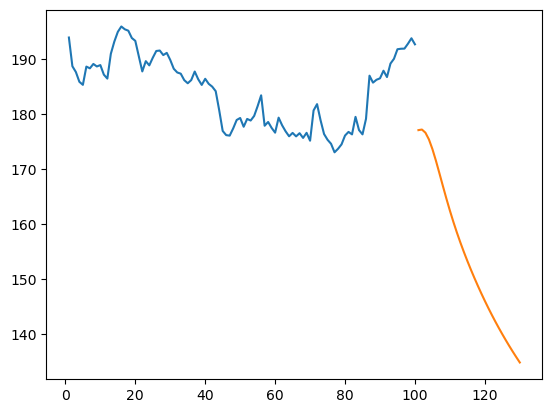

In [396]:
plt.plot(day_new,scaler.inverse_transform(df1[3521:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

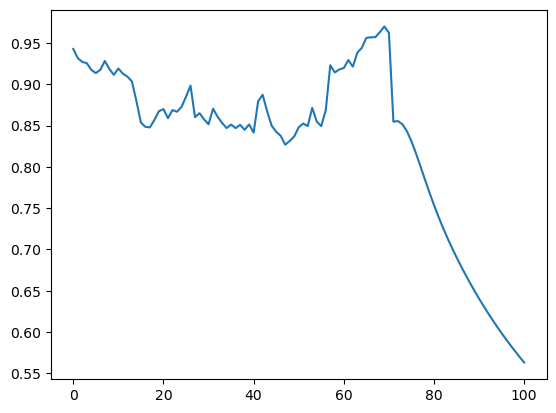

In [397]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3550:])

In [398]:
df3=scaler.inverse_transform(df3).tolist()

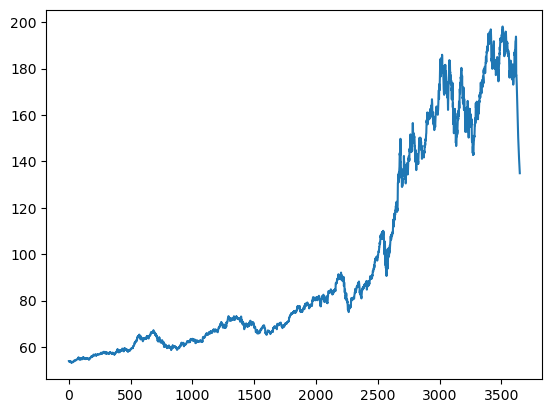

In [399]:
plt.plot(df3)